In [1]:
import pandas as pd    
import matplotlib.pyplot as plt
import numpy as np   
import plotly     

In [2]:
data = pd.read_csv("D:/69th_stop/fitness/workout/data/base.csv")
data = pd.DataFrame(data)
data.head(10)

,Age,Height,Weight,Bmi,BmiClass,dance,target
0,61,1.85,109.30,31.935720,Obese,yes,Dance
1,60,1.71,79.02,27.023700,Overweight,yes,Dance
2,60,1.55,74.70,31.092612,Obese,no,Cardio
3,60,1.46,35.90,16.841809,Underweight,no,Strength_training
4,60,1.58,97.10,38.896010,Obese,yes,Dance
5,59,1.71,79.32,27.126295,Overweight,yes,Dance
6,59,1.70,73.32,25.370242,Overweight,yes,Dance
7,59,1.72,85.32,28.839913,Overweight,no,Cardio+strength_training
8,59,1.46,36.00,16.888722,Underweight,yes,Dance
9,59,1.83,104.70,31.263997,Obese,yes,Dance


In [3]:
print(data.isna().sum())

Age         0
Height      0
Weight      0
Bmi         0
BmiClass    0
dance       0
target      0
dtype: int64


In [4]:
import plotly.express as px

fig = px.bar(data, x="BmiClass", y="target")
             
fig.show()

In [5]:

import plotly.express as px
fig = px.bar(data, x='dance',y='BmiClass')
fig.show()

In [6]:
import plotly.express as px
fig = px.density_heatmap(data,x='BmiClass',y='target')
fig.show()

In [7]:
print(data.columns)
print(data.head(5))

Index(['Age', 'Height', 'Weight', 'Bmi', 'BmiClass', 'dance', 'target'], dtype='object')
   Age  Height  Weight        Bmi     BmiClass dance             target
0   61    1.85  109.30  31.935720        Obese   yes              Dance
1   60    1.71   79.02  27.023700   Overweight   yes              Dance
2   60    1.55   74.70  31.092612        Obese    no             Cardio
3   60    1.46   35.90  16.841809  Underweight    no  Strength_training
4   60    1.58   97.10  38.896010        Obese   yes              Dance


In [8]:
from sklearn import preprocessing 
# using label_encoders in encode object and string values
b= data["BmiClass"]
d = data["dance"]
t = data["target"]

print(b.unique())
le = preprocessing.LabelEncoder()
le.fit(b)
data["BmiClass"] = le.transform(b)
print(data["BmiClass"].unique())

print(d.unique())
le1 = preprocessing.LabelEncoder()
le1.fit(d)
data["dance"] = le1.transform(d)
print(data["dance"].unique())

print(t.unique())
le2 = preprocessing.LabelEncoder()
le2.fit(t)
data["target"] = le2.transform(t)
print(data["target"].unique())



['Obese' 'Overweight' 'Underweight' 'Normal Weight']
[1 2 3 0]
['yes' 'no']
[1 0]
['Dance' 'Cardio' 'Strength_training' 'Cardio+strength_training']
[2 0 3 1]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score   
from sklearn.neural_network import MLPClassifier

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

x = np.array(x)
y = np.array(y)

print(x[:1])
print(y[:2])
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


[[ 61.          1.85      109.3        31.9357195   1.          1.       ]]
[2 2]
(592, 6)
(149, 6)
(592,)
(149,)


In [10]:
from pycaret.classification import setup
from pycaret.classification import compare_models
grid = setup(data=data, target=data.columns[-1], html=True,verbose=True)
best = compare_models()


,Description,Value
0,Session id,5601
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(741, 7)"
4,Transformed data shape,"(741, 7)"
5,Transformed train set shape,"(518, 7)"
6,Transformed test set shape,"(223, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0100
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0410
lr,Logistic Regression,0.9981,0.9999,0.9981,0.9982,0.9979,0.9963,0.9964,0.6900
dt,Decision Tree Classifier,0.9981,0.9987,0.9981,0.9982,0.9979,0.9963,0.9964,0.0110
rf,Random Forest Classifier,0.9981,1.0000,0.9981,0.9982,0.9979,0.9963,0.9964,0.0480
gbc,Gradient Boosting Classifier,0.9981,0.9993,0.9981,0.9982,0.9979,0.9963,0.9964,0.0810
xgboost,Extreme Gradient Boosting,0.9981,1.0000,0.9981,0.9982,0.9979,0.9963,0.9964,0.1530
lightgbm,Light Gradient Boosting Machine,0.9981,1.0000,0.9981,0.9986,0.9982,0.9964,0.9965,0.1370
catboost,CatBoost Classifier,0.9981,1.0000,0.9981,0.9986,0.9982,0.9964,0.9965,1.5370
ada,Ada Boost Classifier,0.9440,0.9841,0.9440,0.8987,0.9190,0.8916,0.8974,0.0310


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

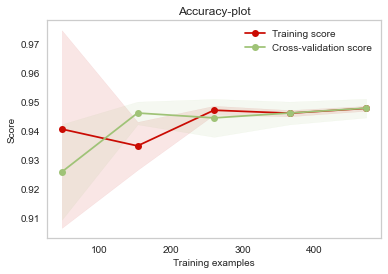

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.77      1.00      0.87        36
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00        10

    accuracy                           0.93       149
   macro avg       0.69      0.75      0.72       149
weighted avg       0.87      0.93      0.89       149

prediction accuracy is: 92.607450
Time consumed for training: 0.115
Time consumed for prediction: 0.00876 seconds
Mean Absolute Error: 0.0738255033557047
Mean Squared Error: 0.0738255033557047
Root Mean Squared Error: 0.27170848966439143


['model.pkl']

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report
import joblib

import scikitplot.estimators as esti
from sklearn import metrics

et = AdaBoostClassifier()

# Fit the model to the training data
et.fit(x_train, y_train)

# Make predictions on the test data
y_pred = et.predict(x_test)



esti.plot_learning_curve(et, x_train, y_train)
plt.title("Accuracy-plot")
plt.show()

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

import time
training_start = time.perf_counter()
et.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds1 = et.predict(x_test)
prediction_end = time.perf_counter()
acc = (preds1 == y_test).sum().astype(float) / len(preds1)*100
acc = acc-0.01 if acc > 0.99 else acc
et_train_time = training_end-training_start
et_prediction_time = prediction_end-prediction_start
# print("Extra_tree_Classifier:",preds1)
print("prediction accuracy is: %f" % (acc))
print("Time consumed for training: %4.3f" % (et_train_time))
print("Time consumed for prediction: %6.5f seconds" % (et_prediction_time))

x = np.array([[61,1.85,109.3,31.9357195,1,1]])
x = x.reshape(1,-1)
p = et.predict(x)
#_Error_Calculation_
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds1)))

joblib.dump(et,'model.pkl')


In [12]:
dict_ = {"index" : ['Obese' ,'Overweight' ,'Underweight', 'Normal Weight'],
"index_l" : [1, 2 ,3 ,0],
"dance" : ['yes' ,'no','-','-'],
"dance_l" : [1 ,0,-1,-1],
"target" : ['Dance' ,'Cardio' ,'Strength_training' ,'Cardio+strength_training'],
"target_l" : [2 ,0, 3 ,1]}

labels = pd.DataFrame(dict_)
print(labels)


           index  index_l dance  dance_l                    target  target_l
0          Obese        1   yes        1                     Dance         2
1     Overweight        2    no        0                    Cardio         0
2    Underweight        3     -       -1         Strength_training         3
3  Normal Weight        0     -       -1  Cardio+strength_training         1


In [13]:
print(data.head(30))

    Age  Height  Weight        Bmi  BmiClass  dance  target
0    61    1.85  109.30  31.935720         1      1       2
1    60    1.71   79.02  27.023700         2      1       2
2    60    1.55   74.70  31.092612         1      0       0
3    60    1.46   35.90  16.841809         3      0       3
4    60    1.58   97.10  38.896010         1      1       2
5    59    1.71   79.32  27.126295         2      1       2
6    59    1.70   73.32  25.370242         2      1       2
7    59    1.72   85.32  28.839913         2      0       1
8    59    1.46   36.00  16.888722         3      1       2
9    59    1.83  104.70  31.263997         1      1       2
10   58    1.71   79.31  27.122875         2      1       2
11   58    1.70   73.41  25.401384         2      0       1
12   58    1.72   85.21  28.802731         2      1       2
13   58    1.47   36.00  16.659725         3      0       3
14   57    1.71   79.30  27.119456         2      0       1
15   57    1.70   73.50  25.432526      

In [21]:
from joblib import load
# [age,height(m),weight(kg),bmi_score,bmi_index,dance]
# [56, 1.80,98.50,30.401235,1,0] >>>>> Cardio
# [35,1.93,109.9, 29.504148,2,0] >>>>> cardio+strength_trainig(1)
# [57,1.47,36.00,16.659725,3,1] >>>>>> dance
# [60,1.46,35.90,16.841809,3,0] >>>>>>> strength_training(3)

model = load('D:/69th_stop/fitness/workout/model.pkl')


y = np.array([[57,1.47,36.00,16.659725,3,1]])
y = y.reshape(1,-1)
p = model.predict(y)
print(p[0])

if p[0]==2:
    print("dance")
elif p[0]==0:
    print("Cardio")
elif p[0]==3:
    print("strength_training")
else:
    print("Cardio + strength_training")
    
    

2
dance
